# Lecture 19

## Plotting vector fields

A vector field is a function of the form ${\mathbf F}:U \to \mathbb R^n$ where $U \subset \mathbb R^n$ is open. We visualize it by placing the vector $\mathbf F(\mathbf x)$ at the point $\mathbf x$.

In [13]:
var('x y')
vf(x,y) = (-y, x)
vf

(x, y) |--> (-y, x)

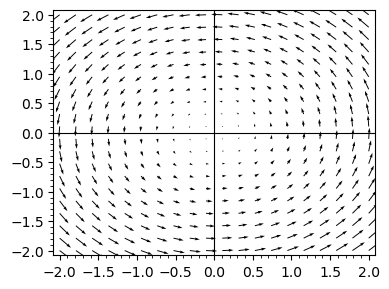

In [14]:
plot_vector_field(vf, (-2,2), (-2,2), figsize=4)

In [15]:
var('x y')
vf(x,y) = (-cos(x*y), sin(x))
vf

(x, y) |--> (-cos(x*y), sin(x))

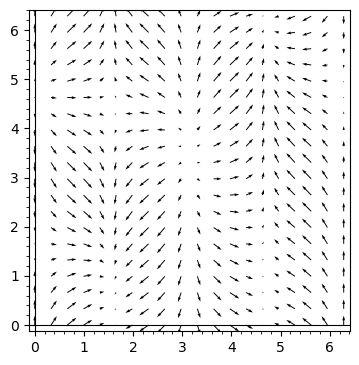

In [76]:
plot_vector_field(vf, (0,2*pi), (0,2*pi), figsize=5, aspect_ratio=1)

### Example: Charges

Columb's law says that the force experienced by a charge $q_1$ at position $\mathbf x_1$ near a charge $q_2$ at position $\mathbf x_2$ is
$$F = \frac{1}{4 \pi \epsilon_0} \cdot \frac{q_1 q_2}{\|\mathbf x_1 - \mathbf x_2\|^3} (\mathbf x_1 - \mathbf x_2),$$
where $\epsilon_0$ is the electrostatic constant. For simplicity, let us take $\epsilon_0=\frac{1}{4 \pi}$ which removes the first term. (This affects the force by a constant multiple.)

We'll work in the plane. Assume that the first particle has charge $q_1=1$ and taking $\mathbf x_1=(x,y)$ and $\mathbf x_2=(a,b)$ we get a force field depending on $q_2$, $a$ and $b$:
$$F(x,y) = \frac{q_2}{((x-a)^2 + (y-b)^2)^{\frac{3}{2}}} (x-a, y-b).$$

In [223]:
def charge_force_field(x2, q2):
    a,b = x2
    F(x,y) = q2/((x-a)^2+(y-b)^2)^(3/2)*vector([x-a, y-b])
    return F

Here is an example of a repelling charge at the point $(1,0)$:

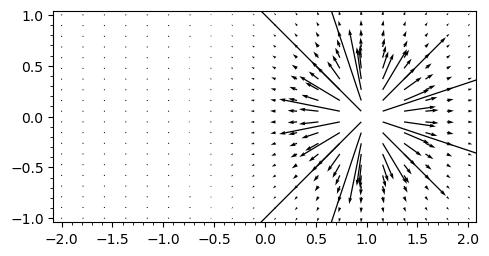

In [224]:
plot_vector_field(charge_force_field((1,0), 1), (-2,2), (-1,1), 
                  axes=False, figsize=5, aspect_ratio=1)

An attracting charge at $(-1, 0)$:

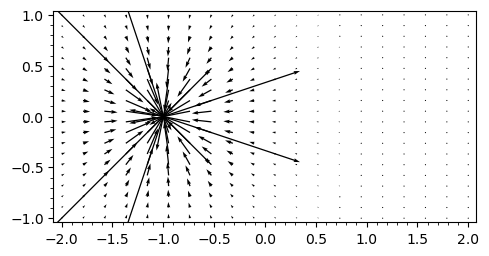

In [225]:
plot_vector_field(charge_force_field((-1,0), -1), (-2,2), (-1,1), 
                  axes=False, figsize=5, aspect_ratio=1)

We can combine the two fields:

In [226]:
combined_field = charge_force_field((1,0), 1) + charge_force_field((-1,0), -1)
combined_field

(x, y) |--> (-(x + 1)/((x + 1)^2 + y^2)^(3/2) + (x - 1)/((x - 1)^2 + y^2)^(3/2), -y/((x + 1)^2 + y^2)^(3/2) + y/((x - 1)^2 + y^2)^(3/2))

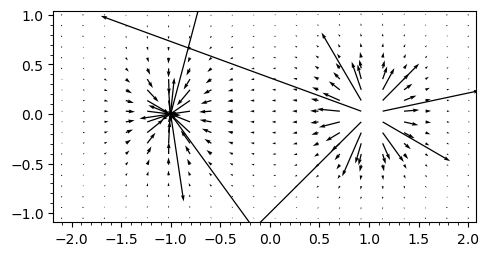

In [227]:
plot_vector_field(combined_field, (-2.1,2), (-1.05,1), 
                  axes=False, figsize=5, aspect_ratio=1)

Note that the force field blows up at the location of the charges.

## Computing flow lines with `ode_solver`

Given a vector field $\mathbf F$, a *flow line* is a path $\gamma:(a,b) \to \mathbb R^n$ such that
$$\gamma'(t) = \mathbf F \circ \gamma(t)$$
for all $t$ in the domain of $\gamma$.

Writing $\gamma(t) = \big(y_0(t), \ldots, y_{n-1}(t)\big)$ and 
$$\mathbf F(\mathbf x)=\big( F_0(\mathbf x), F_2(\mathbf x), \ldots, F_{n-1}(\mathbf x)\big),$$
we see that a flow line is the solution to the differential equation:
\begin{align}
y_0'(t) &= F_0\big(y_0(t), y_1(t), \ldots, y_{n-1}(t)\big), \\
y_1'(t) &= F_1\big(y_0(t), y_1(t), \ldots, y_{n-1}(t)\big), \\
&\vdots \\
y_{n-1}'(t) &= F_{n-1}\big(y_0(t), y_1(t), \ldots, y_{n-1}(t)\big).
\end{align}

So we can compute solutions with `ode_solver`.

**Example:**

This example was borrowed from the [Sage documentation](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/streamline_plot.html):

In [228]:
var('x y')
vf(x,y) = (y, (cos(x)-2) * sin(x))
vf

(x, y) |--> (y, (cos(x) - 2)*sin(x))

In [229]:
plt = plot_vector_field(vf, (-pi, pi), (-pi, pi), axes=False)
plt

In [56]:
def f(t, y):
    # The differential equation for a vector field does not use time
    return vf(*y)

In [57]:
T = ode_solver(f, algorithm='rk8pd')

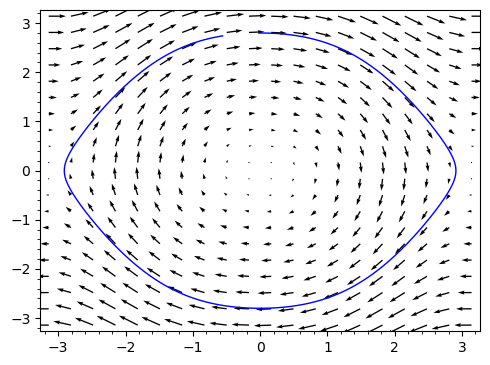

In [58]:
T.ode_solve(t_span=[0, 8.5], y_0=(0,2.8), num_points=1000)
flow_line = [(x,y) for t,(x,y) in T.solution]
plt1 = line2d(flow_line, figsize=5)
plt + plt1

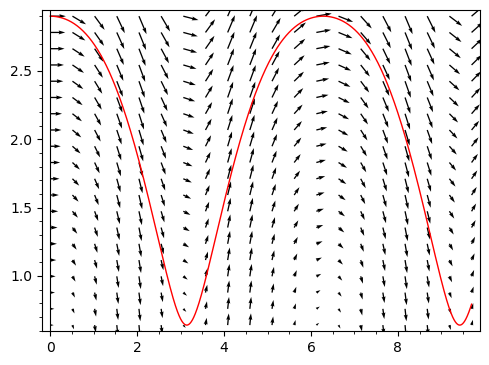

In [62]:
T.ode_solve(t_span=[0, 6], y_0=(0,2.9), num_points=1000)
flow_line = [(x,y) for t,(x,y) in T.solution]
plt2 = line2d(flow_line, figsize=5, color='red')
rect = plt2.get_minmax_data()
plt = plot_vector_field(vf, (rect['xmin'],rect['xmax']), (rect['ymin'],rect['ymax']), figsize=5)
plt2 + plt

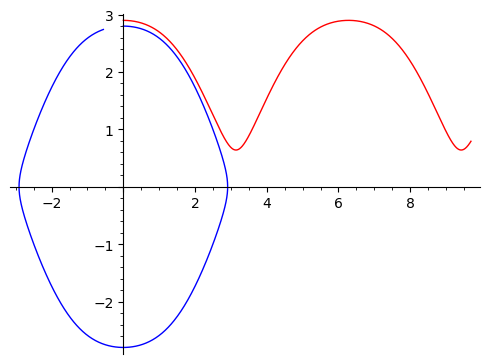

In [63]:
plt1 + plt2

## Streamline plots

There is also a function for plotting the flow lines, which does this automatically. I'm not sure why, but it doesn't seem to support our symbolic vector field. You need to give it a list. (Check [the documentation](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/streamline_plot.html).)

In [69]:
var('x y')
vf_as_list = list(vf(x,y))
vf_as_list

[y, (cos(x) - 2)*sin(x)]

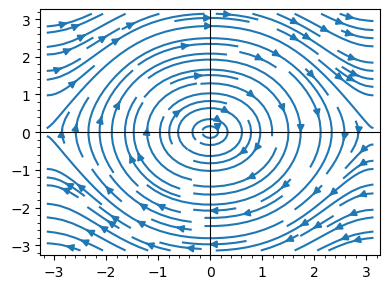

In [70]:
streamline_plot(vf_as_list, (-pi, pi), (-pi, pi), figsize=4)

## Example: Motion of a charged particle.

Before we considered the force field generated by charged particles. We created a `charge_force_field(pt, q)` function which computes the force field on a particle with charge $+1$ caused by placing a charge of $q$ at the point `pt`.

For a simple example, let's consider an attracting charge at the origin:

In [230]:
F = charge_force_field((0,0), -1)
show(F)

(x, y) |--> (-x/(x^2 + y^2)^(3/2), -y/(x^2 + y^2)^(3/2))

Let us compute the motion of a charged particle with mass $m$ (which will be our parameter). We get the differential equation:
$$(x'', y'') = \frac{1}{m} F(x,y).$$

To set up our differential equation, we'll use `z[0]` for $x$, `z[1]` for $x'$, `z[2]` for $y$, `z[3]` for $y'$. Then our differential equation becomes the following:

In [231]:
def ode_function(t, z, params):
    m = params[0]
    return (
        z[1], # z[0]' = x' = z[1]
        1/m * F[0](z[0], z[2]), # z[1]' = 1/m * F_0(x,y)
        z[3], # z[2]' = y' = z[3]
        1/m * F[1](z[0], z[2]), # z[3]' = 1/m * F_1(x,y)
    )
# Demonstration:
ode_function(0, var('x xp y yp'), [1,])

(xp, -x/(x^2 + y^2)^(3/2), yp, -y/(x^2 + y^2)^(3/2))

In [232]:
T = ode_solver(ode_function, algorithm='rk8pd')

Here we compute the motion if our particle starts at $(2,1)$, has mass $1$, and zero initial velocity.

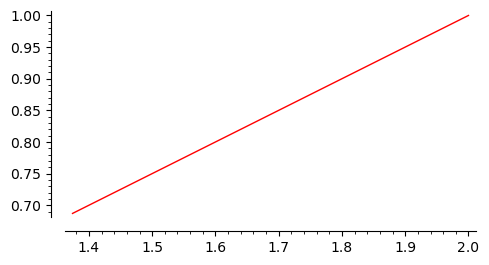

In [233]:
T.ode_solve(t_span=[0,2.5], y_0=(2,0,1,0), params=[1,], num_points=1000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T.solution]
plt2 = line2d(flow_line, figsize=5, aspect_ratio=1)
plt2

As expected, it takes a straight trajectory towards the attracting particle at the origin.

Here we compute the motion if our particle starts at $(0,1)$, has mass $1$, and initial velocity $(1,0)$.

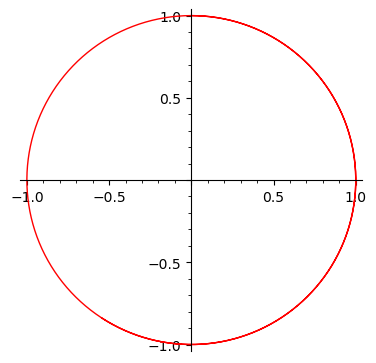

In [234]:
T.ode_solve(t_span=[0,10], y_0=(0,1,1,0), params=[1,], num_points=1000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T.solution]
plt2 = line2d(flow_line, figsize=5, aspect_ratio=1)
plt2

It travels around a circle.

Here we reduce the horizontal velocity.

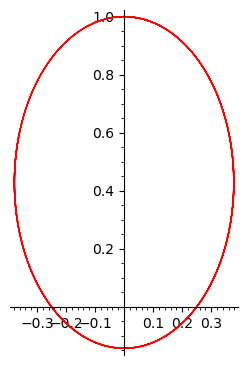

In [236]:
T.ode_solve(t_span=[0,10], y_0=(0,0.5,1,0), params=[1,], num_points=1000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T.solution]
plt2 = line2d(flow_line, figsize=5, aspect_ratio=1)
plt2

We get an elliptical orbit.

Something similar happens if we increase the speed beyond one a bit, then we get an elliptical orbit:

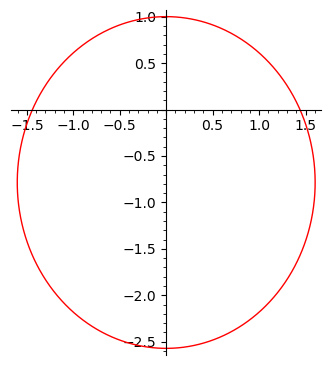

In [245]:
T.ode_solve(t_span=[0,15], y_0=(0,1.2,1,0), params=[1,], num_points=1000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T.solution]
plt2 = line2d(flow_line, figsize=5, aspect_ratio=1)
plt2

If we increase more it becomes a parabola and then a hyperbola:

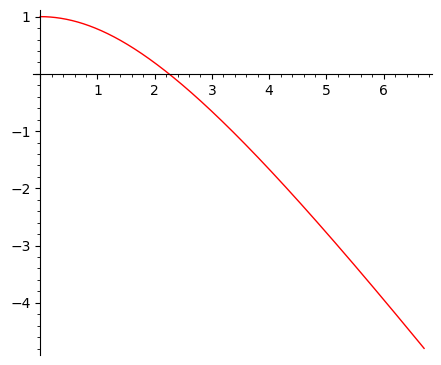

In [250]:
T.ode_solve(t_span=[0,10], y_0=(0,1.5,1,0), params=[1,], num_points=1000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T.solution]
plt2 = line2d(flow_line, figsize=5, aspect_ratio=1)
plt2

Let's consider two attracting particles at the points $(\pm 1, 0)$.

In [251]:
F2 = charge_force_field((1,0), -1)+charge_force_field((-1,0), -1)
show(F2)

(x, y) |--> (-(x + 1)/((x + 1)^2 + y^2)^(3/2) - (x - 1)/((x - 1)^2 + y^2)^(3/2), -y/((x + 1)^2 + y^2)^(3/2) - y/((x - 1)^2 + y^2)^(3/2))

In [252]:
def ode_function2(t, z, params):
    m = params[0]
    return (
        z[1], # z[0]' = x' = z[1]
        1/m * F2[0](z[0], z[2]), # z[1]' = 1/m * F_0(x,y)
        z[3], # z[2]' = y' = z[3]
        1/m * F2[1](z[0], z[2]), # z[3]' = 1/m * F_1(x,y)
    )
# Demonstration:
ode_function(0, var('x xp y yp'), [1,])

(xp, -x/(x^2 + y^2)^(3/2), yp, -y/(x^2 + y^2)^(3/2))

In [253]:
T2 = ode_solver(ode_function2, algorithm='rk8pd')

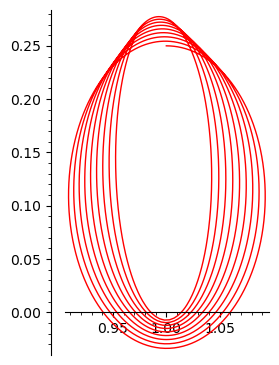

In [258]:
T2.ode_solve(t_span=[0,3], y_0=(1,1,0.25,0), params=[1,], num_points=10000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T2.solution]
plt2 = line2d(flow_line, figsize=5, color='red', aspect_ratio=1)
plt2

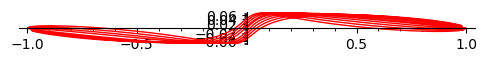

In [263]:
T2.ode_solve(t_span=[0,30], y_0=(0,1/10,0,1/10), params=[1,], num_points=10000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T2.solution]
plt2 = line2d(flow_line, figsize=5, color='red', aspect_ratio=1)
plt2

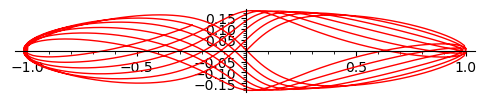

In [262]:
T2.ode_solve(t_span=[0,30], y_0=(0,1/4,0,1/4), params=[1,], num_points=10000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T2.solution]
plt2 = line2d(flow_line, figsize=5, color='red', aspect_ratio=1)
plt2

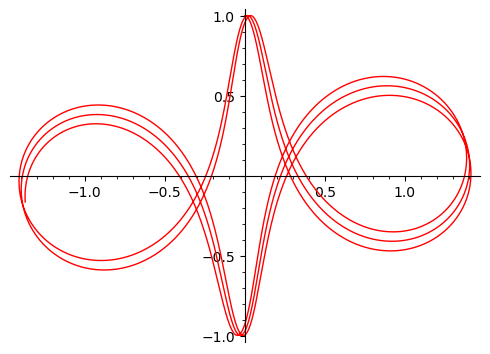

In [270]:
T2.ode_solve(t_span=[0,30], y_0=(0,1/10,1,0), params=[1,], num_points=10000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T2.solution]
plt2 = line2d(flow_line, figsize=5, color='red', aspect_ratio=1)
plt2

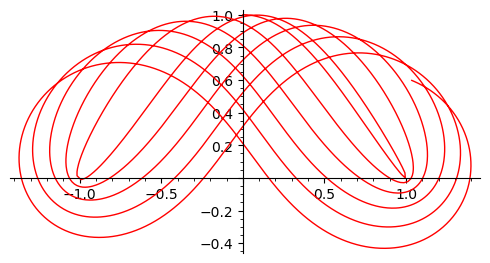

In [272]:
T2.ode_solve(t_span=[0,30], y_0=(0,1/2,1,0), params=[1,], num_points=10000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T2.solution]
plt2 = line2d(flow_line, figsize=5, color='red', aspect_ratio=1)
plt2

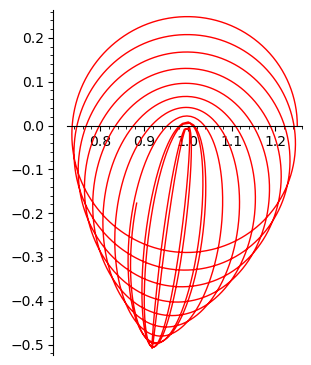

In [266]:
T2.ode_solve(t_span=[0,10], y_0=(1.25,0,0,2), params=[1,], num_points=10000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T2.solution]
plt2 = line2d(flow_line, figsize=5, color='red', aspect_ratio=1)
plt2

In [279]:
F3 = charge_force_field((1,0), 1)+charge_force_field((-1,0), -1)
show(F3)

(x, y) |--> (-(x + 1)/((x + 1)^2 + y^2)^(3/2) + (x - 1)/((x - 1)^2 + y^2)^(3/2), -y/((x + 1)^2 + y^2)^(3/2) + y/((x - 1)^2 + y^2)^(3/2))

In [280]:
def ode_function3(t, z, params):
    m = params[0]
    return (
        z[1], # z[0]' = x' = z[1]
        1/m * F3[0](z[0], z[2]), # z[1]' = 1/m * F_0(x,y)
        z[3], # z[2]' = y' = z[3]
        1/m * F3[1](z[0], z[2]), # z[3]' = 1/m * F_1(x,y)
    )
# Demonstration:
ode_function(0, var('x xp y yp'), [1,])

(xp, -x/(x^2 + y^2)^(3/2), yp, -y/(x^2 + y^2)^(3/2))

In [281]:
T3 = ode_solver(ode_function3, algorithm='rk8pd')

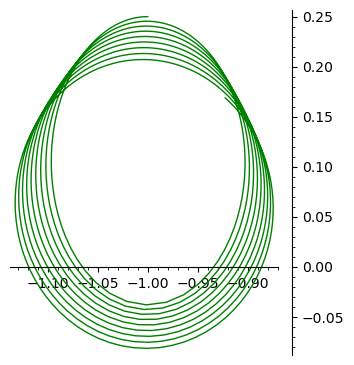

In [285]:
T3.ode_solve(t_span=[0,3], y_0=(-1,-1,0.25,0), params=[1,], num_points=1000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T3.solution]
plt2 = line2d(flow_line, figsize=5, color='green', aspect_ratio=1)
plt2

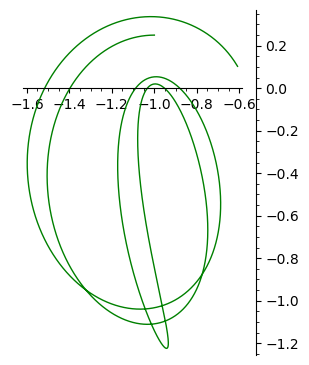

In [290]:
T3.ode_solve(t_span=[0,10], y_0=(-1,-2.5,0.25,0), params=[1,], num_points=10000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T3.solution]
plt2 = line2d(flow_line, figsize=5, color='green', aspect_ratio=1)
plt2

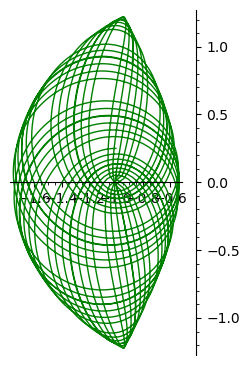

In [291]:
T3.ode_solve(t_span=[0,100], y_0=(-1,-2.5,0.25,0), params=[1,], num_points=10000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T3.solution]
plt2 = line2d(flow_line, figsize=5, color='green', aspect_ratio=1)
plt2

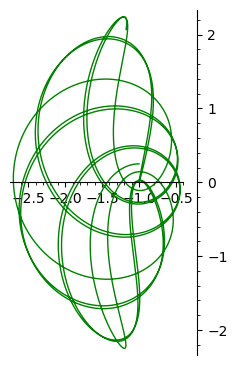

In [294]:
T3.ode_solve(t_span=[0,100], y_0=(-1,-2.6,0.25,0), params=[1,], num_points=10000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T3.solution]
plt2 = line2d(flow_line, figsize=5, color='green', aspect_ratio=1)
plt2

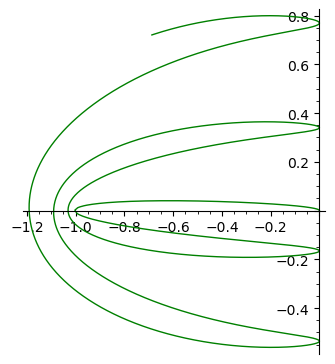

In [299]:
T3.ode_solve(t_span=[0,10], y_0=(0,0,0,1/16), params=[1,], num_points=10000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T3.solution]
plt2 = line2d(flow_line, figsize=5, color='green', aspect_ratio=1)
plt2

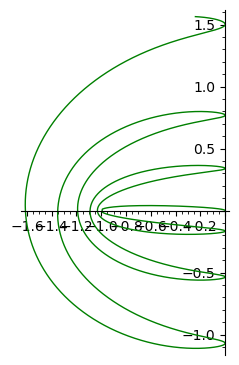

In [302]:
T3.ode_solve(t_span=[0,20], y_0=(0,0,0,1/16), params=[1,], num_points=10000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T3.solution]
plt2 = line2d(flow_line, figsize=5, color='green', aspect_ratio=1)
plt2

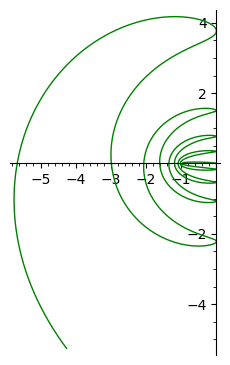

In [303]:
T3.ode_solve(t_span=[0,100], y_0=(0,0,0,1/16), params=[1,], num_points=10000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T3.solution]
plt2 = line2d(flow_line, figsize=5, color='green', aspect_ratio=1)
plt2

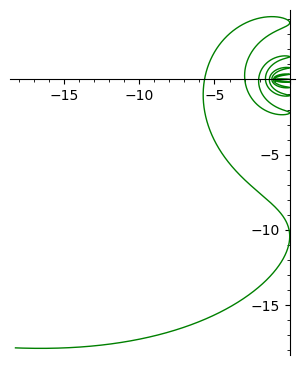

In [305]:
T3.ode_solve(t_span=[0,400], y_0=(0,0,0,1/16), params=[1,], num_points=10000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T3.solution]
plt2 = line2d(flow_line, figsize=5, color='green', aspect_ratio=1)
plt2

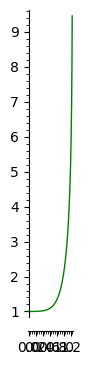

In [307]:
T3.ode_solve(t_span=[0,10], y_0=(0,1,1,0), params=[1,], num_points=1000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T3.solution]
plt2 = line2d(flow_line, figsize=5, color='green', aspect_ratio=1)
plt2

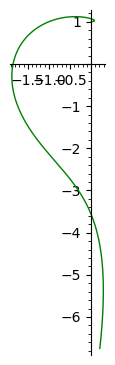

In [318]:
T3.ode_solve(t_span=[0,20], y_0=(0,1/3,1,1/20), params=[1,], num_points=1000)
flow_line = [(x,y) for t,(x,x_prime,y,y_prime) in T3.solution]
plt2 = line2d(flow_line, figsize=5, color='green', aspect_ratio=1)
plt2